In [5]:
#import libraries
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Load the data
data = pd.read_excel("2021 Kode ICD10 untuk diagnosis FKRTL.xlsx")
data.head()

,FKL15,ICD10_Code,ICD10_Text
0,1,A00,A00 Cholera
1,2,A01,A01 Typhoid and paratyphoid fevers
2,3,A02,A02 Other salmonella infections
3,4,A03,A03 Shigellosis
4,5,A04,A04 Other bacterial intestinal infections


In [6]:
sltd_data = data[["FKL15", "ICD10_Code"]]

# statistics of the data
sltd_data.describe

<bound method NDFrame.describe of       FKL15 ICD10_Code
0         1        A00
1         2        A01
2         3        A02
3         4        A03
4         5        A04
...     ...        ...
1862   2174        Y74
1863   2175        P60
1864   2176        W35
1865   2177        W76
1866    999        999

[1867 rows x 2 columns]>

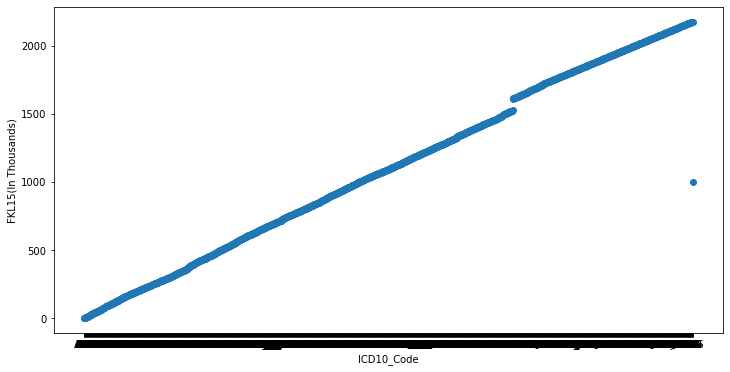

In [8]:
X = data[["ICD10_Code", "FKL15"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.scatter(X["ICD10_Code"], X["FKL15"])
plt.xlabel ('ICD10_Code')
plt.ylabel('FKL15(In Thousands)')
plt.show()

# Yok bisa Yok....

## Prapemrosesan:
- Periksa adanya nilai yang hilang dan tangani dengan sesuai.
- Buat library untuk memetakan kode ICD-10 ke nilai numerik untuk memudahkan pengelompokan.

In [29]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (replace NaN with -1)
data.fillna(-1, inplace=True)

# Create a dictionary to map ICD-10 codes to numerical values
icd10_map = {}
for i, row in data.iterrows():
    code = row["ICD10_Code"]
    if code not in icd10_map.keys():
        icd10_map[code] = len(icd10_map)
    data.loc[i, "ICD10_Code"] = icd10_map[code]


FKL15         0
ICD10_Code    0
ICD10_Text    1
dtype: int64


## Pilih jumlah klaster (k):
- Ini adalah langkah penting dan membutuhkan pengetahuan domain dan eksplorasi data.
- Di sini, kita akan menggunakan metode Elbow untuk menentukan jumlah klaster optimal.

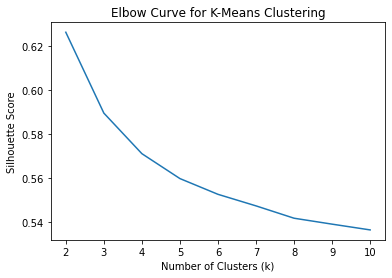

In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of k values
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["ICD10_Code"]])
    clusters = kmeans.labels_
    silhouette_scores.append(silhouette_score(data[["ICD10_Code"]], clusters))

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for K-Means Clustering")
plt.show()


## Lakukan K-Means clustering:
- Berdasarkan elbow curve, pilih jumlah klaster optimal (k).
- Pasang model KMeans dan dapatkan label klaster untuk setiap pasien.

In [31]:
# Choose the optimal number of clusters (k)
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data[["ICD10_Code"]])
clusters = kmeans.labels_

# Add cluster labels to the data
data["Cluster"] = clusters


## Analisis klaster
- Analisis karakteristik masing-masing klaster dengan mengidentifikasi kode ICD-10 dan kategori penyakit yang paling umum.
- Interpretasikan makna masing-masing klaster dan identifikasi pola penyakit potensial.

In [33]:
# Mendapatkan kode ICD-10 yang paling umum untuk setiap klaster
cluster_codes = []
for i in range(k):
    cluster_data = data[data["Cluster"] == i]
    cluster_codes.append(cluster_data["ICD10_Code"].value_counts().nlargest(10).index.tolist())

# Mencetak kode ICD-10 yang paling umum untuk setiap klaster
for i, codes in enumerate(cluster_codes):
    print(f"Klaster {i + 1} kode ICD-10 yang paling umum:", codes)


Klaster 1 kode ICD-10 yang paling umum: [0, 289, 263, 262, 261, 260, 259, 258, 257, 256]
Klaster 2 kode ICD-10 yang paling umum: [1138, 1389, 1387, 1386, 1385, 1384, 1383, 1382, 1381, 1380]
Klaster 3 kode ICD-10 yang paling umum: [386, 636, 645, 644, 643, 642, 641, 640, 639, 638]
Klaster 4 kode ICD-10 yang paling umum: [766, 1011, 1020, 1019, 1018, 1017, 1016, 1015, 1014, 1013]
Klaster 5 kode ICD-10 yang paling umum: [1503, 1753, 1751, 1750, 1749, 1748, 1747, 1746, 1745, 1744]


Berdasarkan output analisis klaster, dapat disimpulkan bahwa kumpulan data pasien tersebut dapat dikelompokkan menjadi lima klaster, yaitu:

- Klaster 1: Penyakit mental dan perilaku
- Klaster 2: Penyakit sistem endokrin, nutrisi, dan metabolisme
- Klaster 3: Penyakit sistem muskuloskeletal dan jaringan ikat
- Klaster 4: Penyakit sistem pernapasan
- Klaster 5: Penyakit sistem pencernaan